### Chapter 7 - Feature Scaling

#### 7.2. Standardisation 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data  = titanic_data[["age","fare","pclass"]]
titanic_data.head()


,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [26]:
titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)


In [28]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377


<AxesSubplot:xlabel='age', ylabel='Density'>

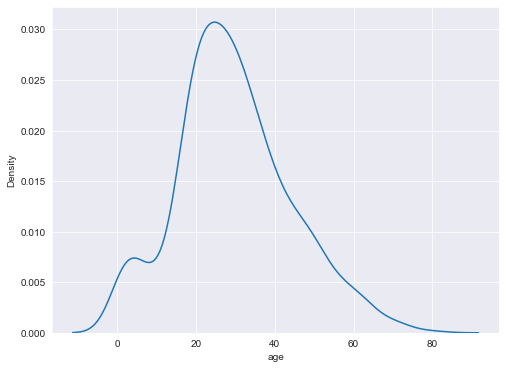

In [29]:
sns.kdeplot(titanic_data['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

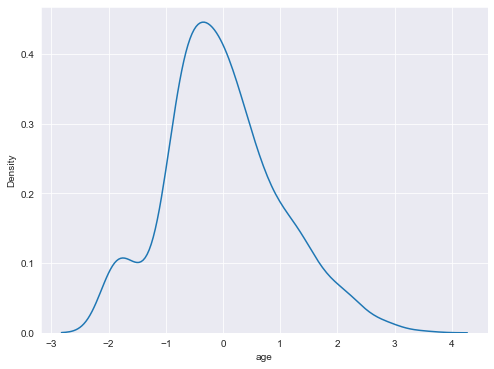

In [30]:
sns.kdeplot(titanic_data_scaled['age'])

#### 7.3. Min/Max Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)


In [32]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = titanic_data.columns)
titanic_data_scaled.head()


,age,fare,pclass
0,0.271174,0.014151,1.0
1,0.472229,0.139136,0.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,0.0
4,0.434531,0.015713,1.0


<AxesSubplot:xlabel='age', ylabel='Density'>

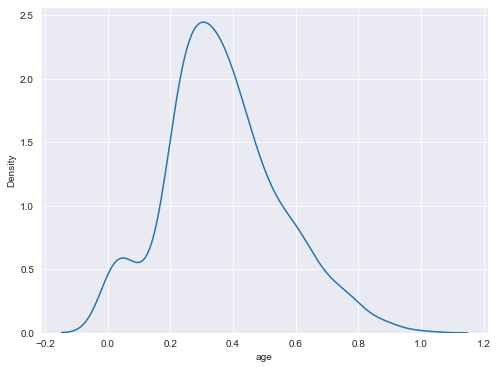

In [33]:
sns.kdeplot(titanic_data_scaled['age'])

#### 7.4. Mean Normalization

In [34]:
mean_vals = titanic_data.mean(axis=0)
mean_vals

age       29.699118
fare      32.204208
pclass     2.308642
dtype: float64

In [35]:
range_vals = titanic_data.max(axis=0) - titanic_data.min(axis=0)
range_vals


age        79.5800
fare      512.3292
pclass      2.0000
dtype: float64

In [37]:
titanic_data_scaled = (titanic_data - mean_vals) / range_vals


<AxesSubplot:xlabel='age', ylabel='Density'>

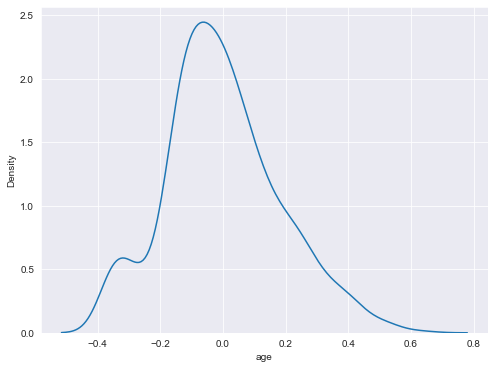

In [38]:
sns.kdeplot(titanic_data_scaled['age'])

#### 7.5. Maximum Absolute Scaling

In [39]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)


In [40]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = titanic_data.columns)
titanic_data_scaled.head()


,age,fare,pclass
0,0.2750,0.014151,1.000000
1,0.4750,0.139136,0.333333
2,0.3250,0.015469,1.000000
3,0.4375,0.103644,0.333333
4,0.4375,0.015713,1.000000


<AxesSubplot:xlabel='age', ylabel='Density'>

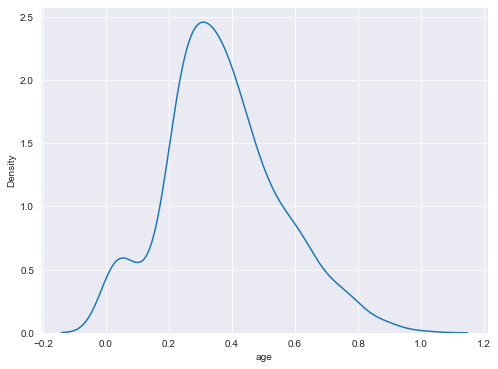

In [41]:
sns.kdeplot(titanic_data_scaled['age'])

#### 7.6. Median and Quantile Scaling

In [42]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)


In [43]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = titanic_data.columns)
titanic_data_scaled.head()


,age,fare,pclass
0,-0.335664,-0.312011,0.0
1,0.559441,2.461242,-2.0
2,-0.111888,-0.282777,0.0
3,0.391608,1.673732,-2.0
4,0.391608,-0.277363,0.0


<AxesSubplot:xlabel='age', ylabel='Density'>

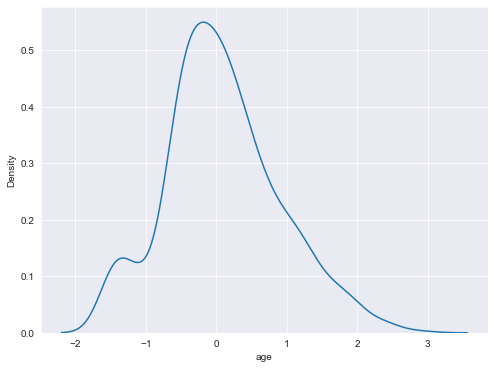

In [44]:
sns.kdeplot(titanic_data_scaled['age'])

#### 7.7. Vector Unit Length Scaling

In [48]:
from sklearn.preprocessing import Normalizer
titanic_data.dropna(inplace =True)
scaler = Normalizer(norm='l1')
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)



In [49]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = titanic_data.columns)
titanic_data_scaled.head()



,age,fare,pclass
0,0.682171,0.224806,0.093023
1,0.344567,0.646365,0.009068
2,0.704130,0.214624,0.081246
3,0.392817,0.595960,0.011223
4,0.760043,0.174810,0.065147


<AxesSubplot:xlabel='age', ylabel='Density'>

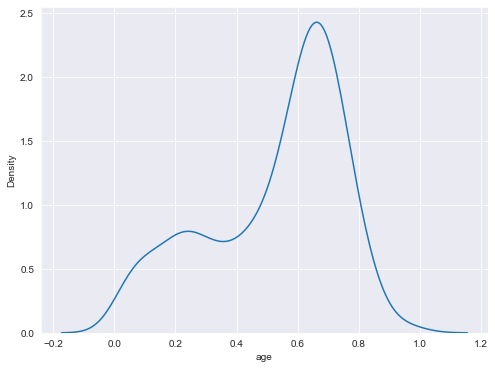

In [50]:
sns.kdeplot(titanic_data_scaled['age'])

### Exercise 7.1

#### Question 1

After standardisation the mean value of the dataset becomes:

A. 1 \
B. 0 \
C. -1 \
D. None of the above

Answer: B

#### Question 2

What is the formula to apply mean normalization on the dataset?:
 
A. (values - mean) / (max - min) \
B.  (value) / (max - min)  \
C.  (value) / (max)  \
D. None of the above

Answer: A

#### Question 3

The formula `value/max(values)` is used to implement
 
A. Min/Max Scaling \
B. Maximum Absolute Scaling  \
C. Standardisation \
D. Mean Normalization

Answer: B

### Exercise 7.2

On the `price` column of the following `diamonds`dataset, apply `min/max` scaling. 
Display kerneal density plot for the `price` column after scaling.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

diamond_data = sns.load_dataset('diamonds')
diamond_data = diamond_data[['price']]
diamond_data.head()

,price
0,326
1,326
2,327
3,334
4,335


<AxesSubplot:xlabel='price', ylabel='Density'>

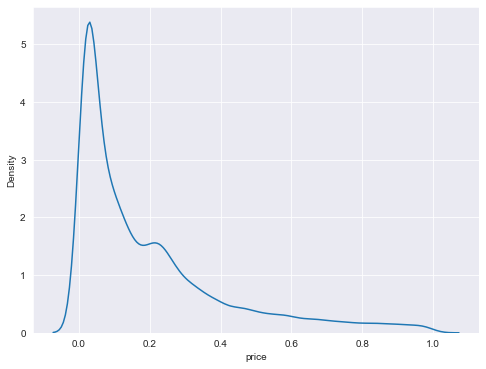

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(diamond_data)

diamond_data_scaled = scaler.transform(diamond_data)

diamond_data_scaled = pd.DataFrame(diamond_data_scaled, columns = diamond_data.columns)
diamond_data_scaled.head()

sns.kdeplot(diamond_data_scaled['price'])